In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step(x, y):
    while True:
        dx = np.random.randint(-1, 2)
        dy = np.random.randint(-1, 2)
        if (dx ==0 and dy == 0) or (dx == 1 and dy == 1) or (dx == -1 and dy == -1) or (dx == 1 and dy == -1) or (dx == -1 and dy == 1) or x+dx<= 0 or y+dy<=0 or x+dx>31 or y+dy>31:
            continue
        else:
            break
    return x+dx, y+dy

In [3]:
def upd(lattice): # updates the lattice
    
    xy = lattice[:, :2]
    
    x_end, y_end = xy[-1][0], xy[-1][1]
    x, y = step(xy[-1][0], xy[-1][1])
    
    if x_end == 1 and y_end == 1 and [2, 1] in xy.tolist() and [1, 2] in xy.tolist():
        return lattice
    if x_end == 1 and y_end == 31 and [2, 31] in xy.tolist() and [1, 30] in xy.tolist():
        return lattice
    if x_end == 31 and y_end==31 and [30, 31] in xy.tolist() and [31, 30] in xy.tolist():
        return lattice
    if x_end == 31 and y_end == 1 and [31, 2] in xy.tolist() and [30, 1] in xy.tolist():
        return lattice
    
    if [x_end+1, y_end] in xy.tolist() and [x_end-1, y_end] in xy.tolist() and [x_end, y_end+1] in xy.tolist() and [x_end, y_end-1] in xy.tolist():
        return lattice
            
    if x_end == 1 and [x_end+1, y_end] in xy.tolist() and [x_end, y_end+1] in xy.tolist() and [x_end, y_end-1] in xy.tolist():
        return lattice
    if y_end == 1 and [x_end, y_end+1] in xy.tolist() and [x_end+1, y_end] in xy.tolist() and [x_end-1, y_end] in xy.tolist():
        return lattice
    if y_end == 31 and [x_end, y_end-1] in xy.tolist() and [x_end+1, y_end] in xy.tolist() and [x_end-1, y_end] in xy.tolist():
        return lattice
    if x_end == 31 and [x_end-1, y_end] in xy.tolist() and [x_end, y_end+1] in xy.tolist() and [x_end, y_end-1] in xy.tolist():
        return lattice
    
    if [x, y] in xy.tolist():
        return upd(lattice)
    if [x, y] not in xy.tolist():
        H_or_P = np.random.choice([0, 1], p = [0.3, 0.7]) 
       
        return upd(np.vstack([lattice, [x, y, H_or_P]]))
  

In [4]:
def energy(lattice):
    xy = lattice[:, :2]
    xy_list = xy.tolist()

    H_P = lattice[:, 2]

    i = 0
    E = 0

    for i in range(len(H_P)):
        if H_P[i] == 0:
            continue
        if H_P[i] == 1:
            for d in [[1, 0], [-1, 0], [0, 1], [0, -1]]:
                xy_P = xy[i] + d
                xy_P_list = xy_P.tolist() 

                if xy_P_list in xy_list:
                    index = xy_list.index(xy_P_list)

                    if i-index>1 and H_P[index] == 1:
                        E = E + 1
                        
    return (-1) * E

In [5]:
M = 1000

lattice_M = [] 
E = []
L = []

for i in range(M):
    lattice = np.array([[16, 16, np.random.choice([0, 1], p = [0.3, 0.7])]])
    lattice = upd(lattice)
    lattice_M.append(lattice)
    L.append(len(lattice)-1) 
    E.append(energy(lattice))

In [ ]:
xy = lattice[:, :2]
xy_list = xy.tolist()

H_P = lattice[:, 2]

i = 0
E = 0

while i<len(H_P):
    if H_P[i] == 0:
        i = i+1
    if H_P[i] == 1:
        for d in [[1, 0], [-1, 0], [0, 1], [0, -1]]:
            xy_P = xy[i] + d
            xy_P_list = xy_P.tolist() 
            
            if xy_P_list in xy_list:
                index = xy_list.index(xy_P_list)
                
                if i-index>1 and H_P[index] == 1:
                    E = E + 1
        i = i+1
print(E)

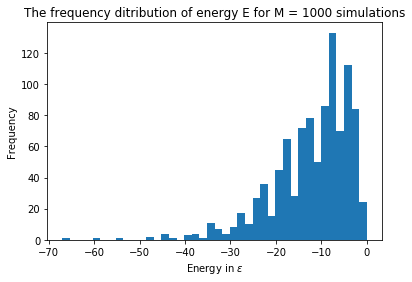

In [8]:
plt.hist(E, 40)

plt.title("The frequency ditribution of energy E for M = 1000 simulations")
  
plt.xlabel('Energy in $\epsilon$')
plt.ylabel('Frequency')
plt.savefig('Protein 1.png')
plt.show()

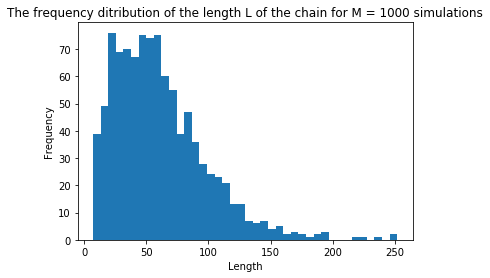

In [9]:
plt.hist(L, 40)

plt.title("The frequency ditribution of the length L of the chain for M = 1000 simulations")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.savefig('Protein 2.png')
plt.show()

In [10]:
print(f'Maximum energy found is {max(E)}')

Maximum energy found is 0


In [11]:
from statistics import median

In [12]:
max_index = E.index(max(E))
min_index = E.index(min(E))
inter_index = E.index(median(E)) 

lattice_max = lattice_M[max_index]
lattice_min = lattice_M[min_index]
lattice_inter = lattice_M[inter_index]

In [25]:
def plot_protein(lattice, length, energy):
    
    x_i, y_i = 16, 16

    x = np.arange(1, 32, 1)
    y = np.arange(1, 32, 1)

    xx, yy = np.meshgrid(x, y)


    plt.figure(figsize=(10,10))

    plt.xlim(0, 32)
    plt.ylim(0, 32)
    plt.xticks(x, size=12)
    plt.yticks(y, size=12)
    
    plt.grid()



    x = lattice[:, 0]
    y = lattice[:, 1]
    group = lattice[:, 2]

    text = []
    for i in range(len(group)):
        if group[i] == 1:
            text.append('H')
        if group[i] == 0:
            text.append('P')


    plt.plot(x, y, label = 'Protein')
    for i, txt in enumerate(text):
        if txt == 'H':
            plt.scatter(x[i], y[i], color = 'pink')
        else:
            plt.scatter(x[i], y[i], color = 'palegreen')

        plt.annotate(txt, (x[i], y[i]))

        
    plt.text(2, 4, f'E = {energy} $\epsilon$')
    plt.text(2, 3, f'L = {length}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.savefig('Protein min.png')
    plt.legend()
    
    plt.show()



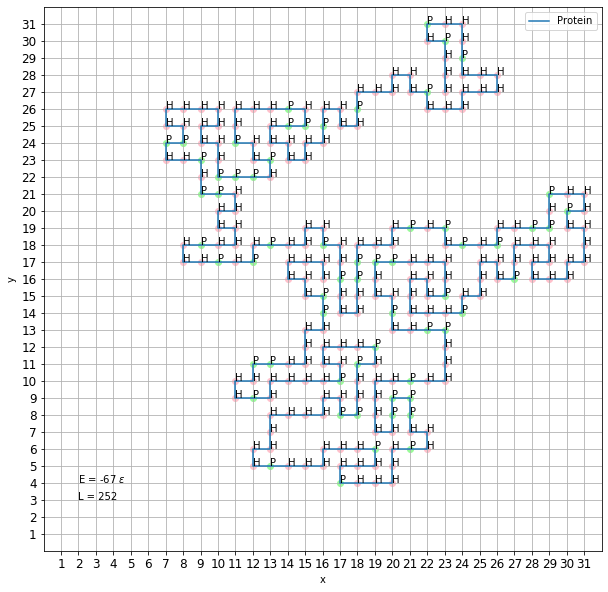

In [26]:
plot_protein(lattice_min, L[min_index], E[min_index])


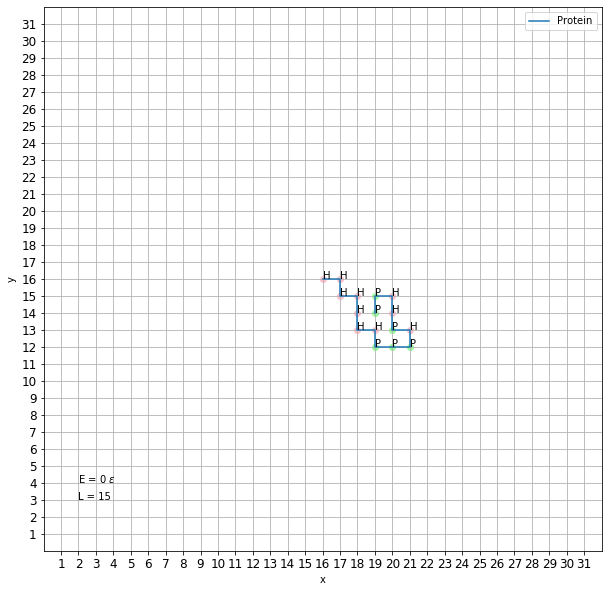

In [22]:
plot_protein(lattice_max, L[max_index], E[max_index])

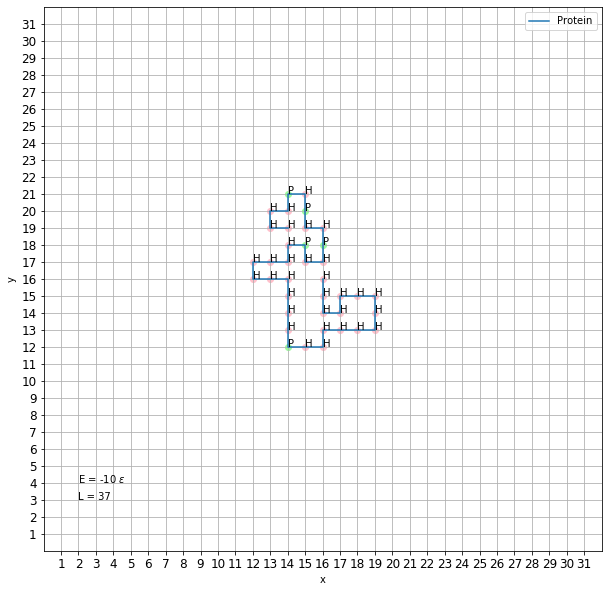

In [24]:
plot_protein(lattice_inter, L[inter_index], E[inter_index])

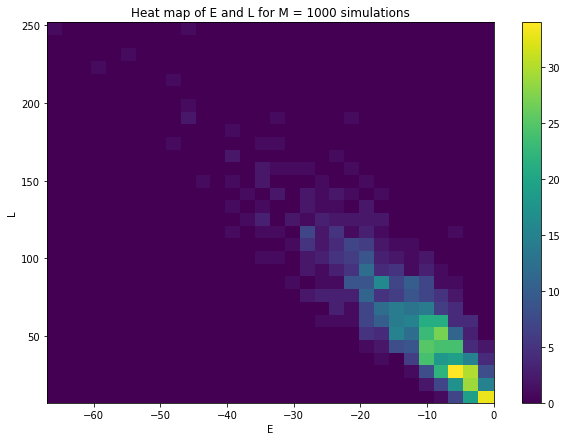

In [28]:
fig = plt.subplots(figsize =(10, 7)) 
# Creating plot 
plt.hist2d(E, L, bins = 30) 
plt.title("Correlation map of E and L for 1000 simulations") 
plt.colorbar() 
plt.xlabel('E') 
plt.ylabel('L') 
# plt.ylim([0, 300]) 
# plt.xlim([-70, 0]) 
 
   
# show plot 
plt.show()